# RNN (Recurent Neural Network) - LSTM (Long Short Term Memory) - GRU (Gated Recurent Unit)

# **RNN**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generate example data
X = np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, size=(100,))

In [3]:
X.shape, y.shape

((100, 10, 1), (100,))

In [4]:
# Define the model
model = Sequential([
    SimpleRNN(32, input_shape=(10, 1)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5954 - loss: 0.6741
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5600 - loss: 0.6846
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5863 - loss: 0.6598 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6515 - loss: 0.6563
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5747 - loss: 0.6643
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6214 - loss: 0.6531 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5808 - loss: 0.6599 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5766 - loss: 0.6688 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5580 - loss: 0.6736 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5756 - loss: 0.6605
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5704 - loss: 0.6671 
Test Loss: 0.6579983234405518
Test Accuracy: 0.5899999737739563


## LSTM (Long Short Term Memory) is a special kind of RNN, capable of learning long-term dependencies.

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.6633
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5290
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3987
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3394
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2318
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2080
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1623 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1586
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1579 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1570 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1703
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1487
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1601 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1482
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1471
Epoch 16/100
4/

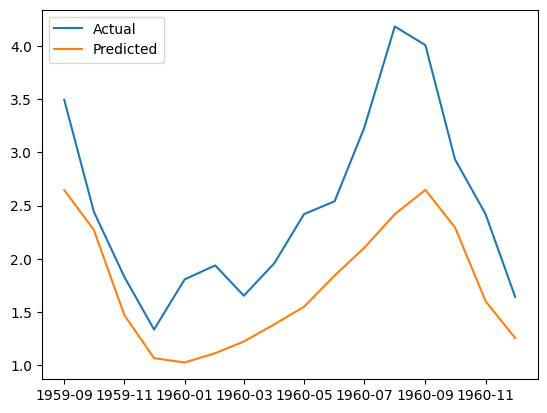

In [6]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

## let's build a simple RNN-based character-level text generator using a sample text. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)
# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 2.9483
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.9228
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.8872
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.8801
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.8490
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7963
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7055 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7346 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6278
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.7106
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7559
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.6944
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.6661
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.8414
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7222
Epoch 16/100
5/5 

## GRU (Gated Recurrent Unit) is a variation of LSTM. It has fewer parameters than LSTM, as it lacks an output gate.

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3869
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3062
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2523
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2058
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1878
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1521 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1393
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1575
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1677
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1362
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1432 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1406
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1240
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1421
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1309
Epoch 16/100
4/4 

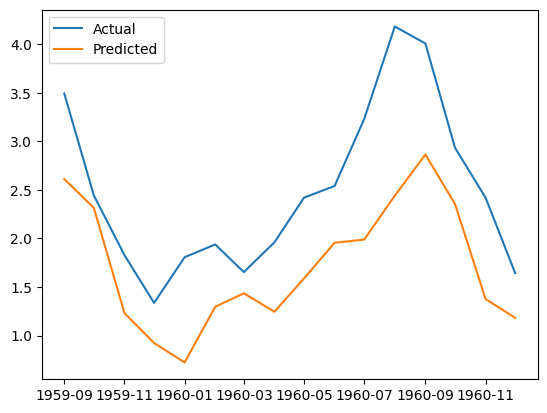

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the change here
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model using GRU
model = Sequential([
    GRU(32, input_shape=(seq_length, 1)),  # Note the change here
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

## GRU on Text

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense  # Import GRU instead of LSTM

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text)))  # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars))  # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model using GRU
model = Sequential([
    GRU(128, input_shape=(X.shape[1], X.shape[2])),  # Change LSTM to GRU here
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50):  # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 2.9422
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.9107
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.8746
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.8803
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8462 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.8606
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.7881
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7472
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.7087
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7515 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9412
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.5772
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.6572
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6951
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.7534
Epoch 16/100
5/5 